In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#from google.colab import files
#uploaded = files.upload()
dataset = pd.read_csv('winequality-white.csv', sep = ';' )
dataset.head()

Saving winequality-white.csv to winequality-white.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
y = dataset.loc[:,'quality'].values
x = StandardScaler().fit_transform(dataset.iloc[:,0:11])
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
np.unique(y)

array([3, 4, 5, 6, 7, 8, 9])

In [0]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014]
0.8136148733941033


In [0]:
colors = 'rgbkcmy'

rmap = {
    3: 0,
    4: 1,
    5: 2,
    6:3,
    7:4,
    8:5,
    9:6
}

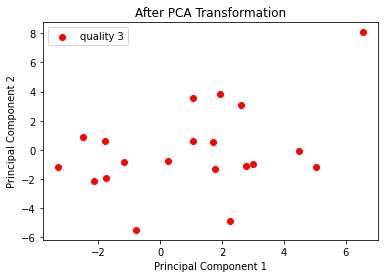

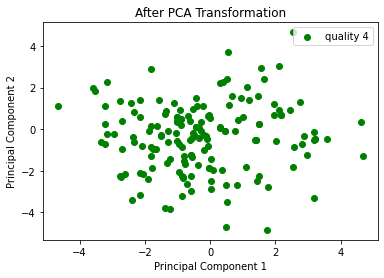

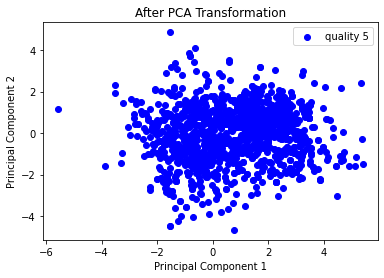

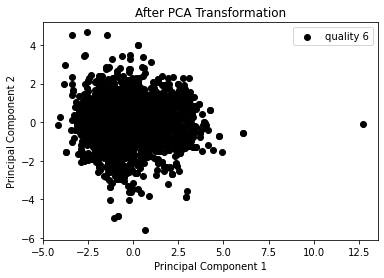

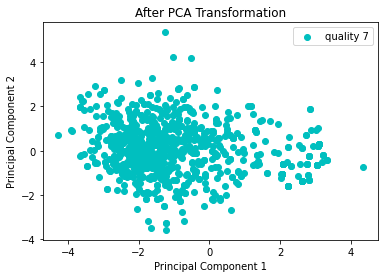

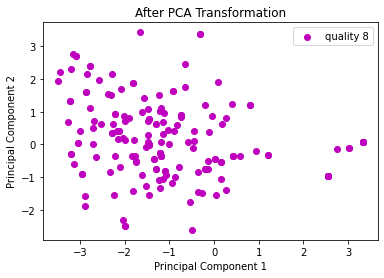

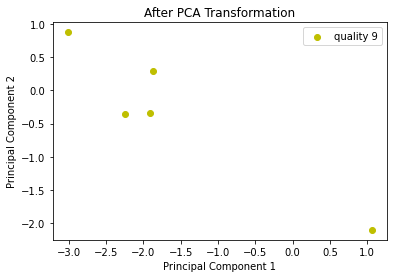

In [0]:
for name in np.unique(y):
  plt.scatter(pc[y==name, 0], pc[y==name, 1],
                color=colors[rmap.get(name)],
                label =('quality ')+str(name))
  plt.legend()
  plt.title('After PCA Transformation')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.show()

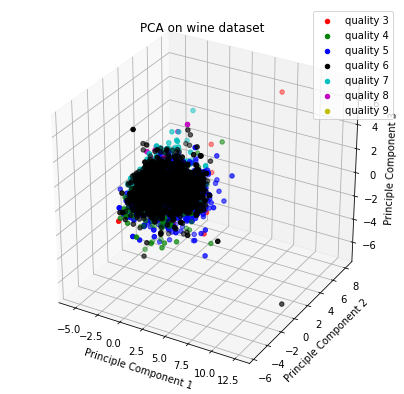

In [0]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(y):
    ax.scatter3D(pc[y==i,0],
             pc[y==i,1],
             pc[y==i,2],
                 color=colors[rmap.get(i)], label='quality '+ str(i))

ax.set_xlabel("Principle Component 1")
ax.set_ylabel("Principle Component 2")
ax.set_zlabel("Principle Component 3")

plt.legend()
plt.title('PCA on wine dataset')
plt.show()